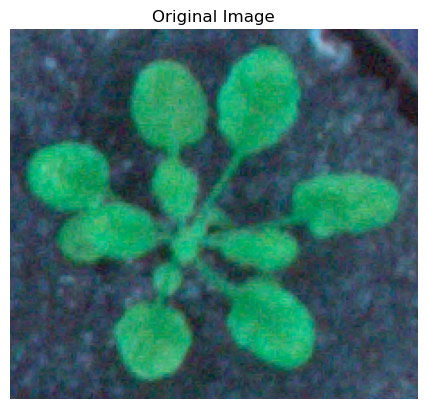

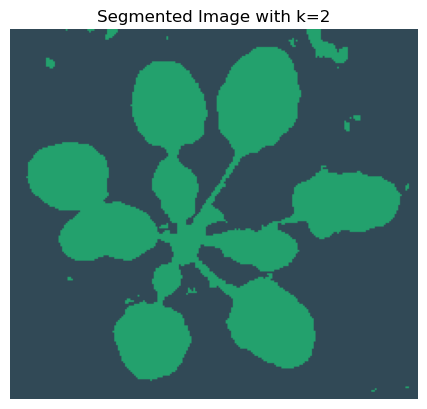

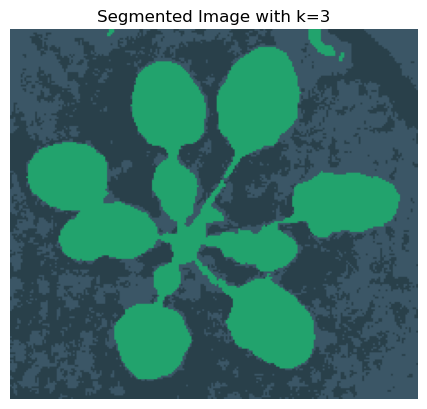

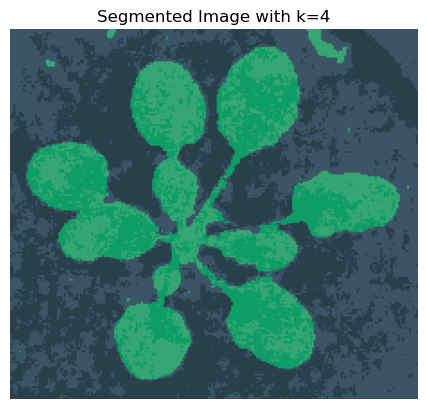

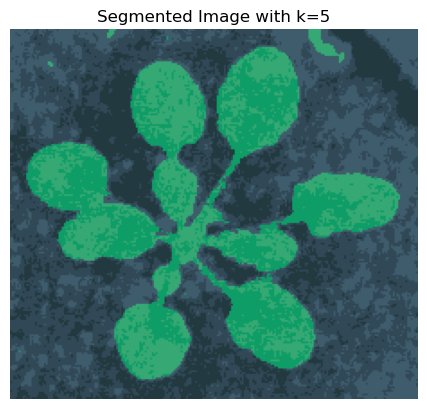

To determine the k value we analyzded which is the best for the segmentation. we decided to k=3


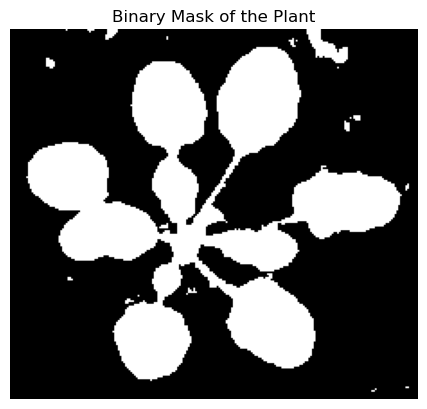

In [1]:
# Fatih Yiğitel, Barış Sinaplı
import cv2
import numpy as np
import matplotlib.pyplot as plt

#In this function we display color images
def display_image(img, title='Image', cmap=None):
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

# In this function we display grayscale images
def display_image_gray(img, title='Image'):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# We read the input images in here
img = cv2.imread('ara2012_plant004_rgb.png')
display_image(img, 'Original Image')

# In here we conwet the images as floating point
img_float = np.float32(img)


# We shape the image into two dimension of an array that includes pixels
pixels = img_float.reshape((-1, 3))

# We set criteria for k-means clustering
# it minimize the distance between each data point and its corresponding cluster center. 
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# To determine the correct parameter of the value of k we use segmentation with different numbers
for k in [2, 3, 4, 5]:
    # We applies k-means clustering with using kmeans function form library
    _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # we change the cluster centers back to 8-bit values
    centers = np.uint8(centers)

    # In here each pixel changed with the color of its cluster center
    segmented_img = centers[labels.flatten()].reshape(img.shape)
    
    # Later we shows segmented image
    display_image(segmented_img, f'Segmented Image with k={k}')
    

print("To determine the k value we analyzded which is the best for the segmentation. we decided to k=3")


# We do that same stesps above
img = cv2.imread('ara2012_plant004_rgb.png')
img_float = np.float32(img)
pixels = img_float.reshape((-1, 3))
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Best value of h and use kmeans clustering
best_k = 3
_, labels, centers = cv2.kmeans(pixels, best_k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)

# we finnd the label that corresponse to the plant segment that base on the green channel
plant_label = np.argmax(centers[:, 1])  
# we assumes that the plant area has a higher green channel value

# In here to arrange the labels the labels are resahped to match the original image shape
labels_reshaped = labels.reshape(img.shape[:2])

# We create a binary mask that shows the plant segment
binary_mask = np.where(labels_reshaped == plant_label, 255, 0).astype('uint8')

# Lastly we get the binary mask of image
display_image_gray(binary_mask, 'Binary Mask of the Plant')
